In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
# import seaborn as sns
style.use('ggplot')
matplotlib inline
import scipy.stats as stat

In [3]:
df = pd.read_csv("lead_under_six.csv")

rdf = df.loc[:, ['year', 'location', 'ageGroup', 'ebllDescription',
       'pctEbll',  'numTested', 'numEbll', 'denominator', 'pctTested',
       'unstable']]
rrdf = rdf.loc[rdf["unstable"] ==False]
rfdf=rrdf.dropna()
xz=rfdf['pctEbll'].astype(float)
rfdf['xz']=xz
rfdf.loc[:, ['year', 'location', 'ebllDescription',
       'pctEbll',  'numTested', 'numEbll', 'denominator', 'pctTested']]
rfdfg=rfdf.groupby(['location']).mean()


In [4]:
ll=rfdfg.index
mn=['Minnesota']
for item in ll:
    if item != 'Minnesota':
        mn.append(item)
sorterIndex = dict(zip(mn,range(len(mn))))
# print(sorterIndex)
rfdfg['mn_Rank'] = rfdfg.index.map(sorterIndex)

# df.sort(['Tm_Rank', 'Player', 'Year'], \
#         ascending = [True , True, True], inplace = True)
# rfdfg.reset_index()
rfdfg=rfdfg.sort_values(['mn_Rank'])

<function matplotlib.pyplot.show(*args, **kw)>

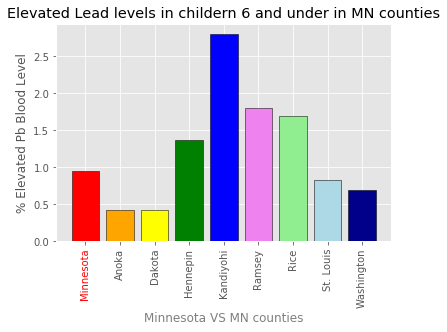

In [5]:
x=rfdfg.index
cp=rfdfg['xz']




# Bar chart properties
plt.title('Elevated Lead levels in childern 6 and under in MN counties')
plt.xlabel('Minnesota VS MN counties').set_color("gray")
plt.ylabel('% Elevated Pb Blood Level')
bars = plt.bar(x, cp, align='center',edgecolor='black')
bars[0].set_facecolor('Red')
bars[1].set_facecolor('orange')
bars[2].set_facecolor('yellow')
bars[3].set_facecolor('green')
bars[4].set_facecolor('blue')
bars[5].set_facecolor('violet')
bars[6].set_facecolor('lightgreen')
bars[7].set_facecolor('lightblue')
bars[8].set_facecolor('darkblue')
plt.xticks(x, rotation=90)

plt.gca().get_xticklabels()[0].set_color("red")

plt.savefig('Elevated pct lead levels in childer 6 and under in MN counties.png',dpi=300, bbox_inches = "tight")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

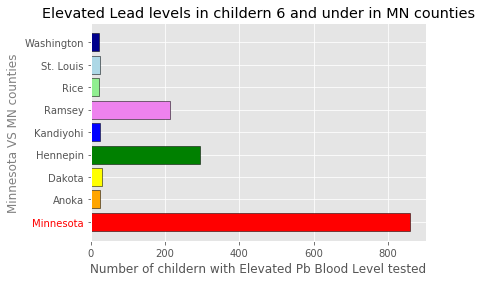

In [6]:
x=rfdfg.index
cp=rfdfg['numEbll']




# Bar chart properties
plt.title('Elevated Lead levels in childern 6 and under in MN counties')
plt.ylabel('Minnesota VS MN counties').set_color("gray")
plt.xlabel('Number of childern with Elevated Pb Blood Level tested')
bars = plt.barh(x, cp, align='center',edgecolor='black')
bars[0].set_facecolor('Red')
bars[1].set_facecolor('orange')
bars[2].set_facecolor('yellow')
bars[3].set_facecolor('green')

bars[4].set_facecolor('blue')
bars[5].set_facecolor('violet')
bars[6].set_facecolor('lightgreen')
bars[7].set_facecolor('lightblue')
bars[8].set_facecolor('darkblue')
# plt.xticks(x, rotation=90)



plt.gca().get_yticklabels()[0].set_color("red")

plt.savefig('Elevated lead levels in childer 6 and under in MN counties.png',dpi=300, bbox_inches = "tight")
plt.show

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file = 'Under 18 in Poverty (2011-2016)'
poverty_df = pd.read_csv(file)
poverty_df.head()

In [ ]:
len(poverty_df.index)

In [ ]:
file2 = 'lead_under_six.csv'
lead_df = pd.read_csv(file2)
lead_df.dropna()
lead_df.head()

In [ ]:
len(lead_df.index)

In [ ]:
file3 = 'uninsured_children_by_county.csv'
uninsured_df = pd.read_csv(file3)
uninsured_df.head()

In [ ]:
len(uninsured_df.index)

In [ ]:
uninsured_df.dtypes

In [ ]:
file4 = "average_poverty_data2"
average_poverty_df = pd.read_csv(file4)
average_poverty_df.head()

In [ ]:
len(average_poverty_df.index)

In [ ]:
average_poverty_df.dtypes

In [ ]:
merged_df = pd.merge(uninsured_df, average_poverty_df, on ="County")
#on="County Name (State)"
merged_df.head()

In [ ]:
merged_df.to_csv("Merged_Data", index=True, header=True)

In [ ]:
sns.lmplot(x = "Average Uninsured", y = "Poverty Percentage Average", data = merged_df, fit_reg=False)
plt.title("Poverty Average Count By County")
plt.xlabel("Average Percentage of Uninsured")
plt.ylabel("Average Percentage of Individuals in Poverty")
plt.gcf().subplots_adjust(top=0.9)

plt.savefig("Poverty vs Insurance.png")
plt.show()

In [ ]:
x_axis = np.arange(len(merged_df))
tick_locations = [value+0.5 for value in x_axis]
plt.bar(x_axis, merged_df['Poverty Percentage Average'], color = 'b', alpha = 0.5, align = 'edge')
plt.xticks(tick_locations, merged_df['County'], rotation = 'vertical')
plt.figure(figsize=(40,10))
plt.tight_layout()
plt.show()